In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/mushroom-classification/mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
df["class"].head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [9]:
df["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

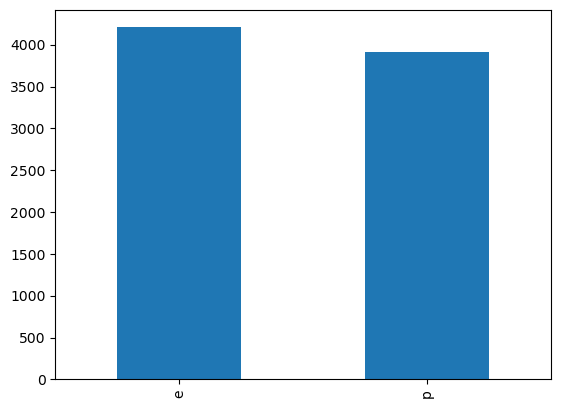

In [10]:
df["class"].value_counts().plot(kind="bar");

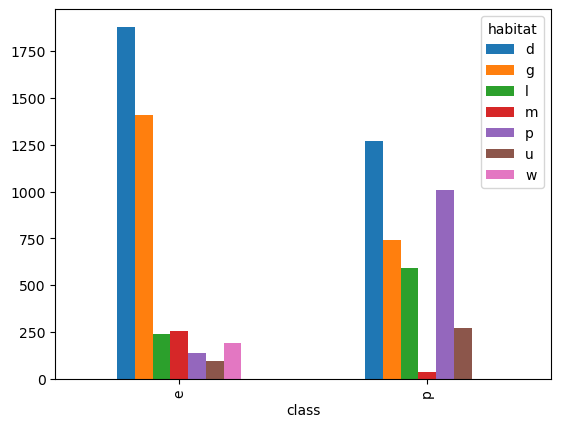

In [11]:
pd.crosstab(df["class"], df["habitat"]).plot(kind="bar");

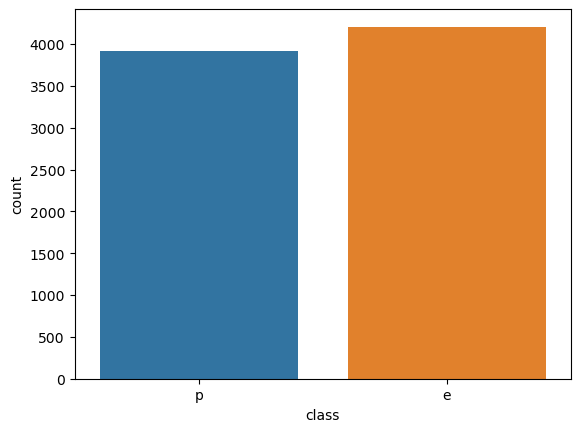

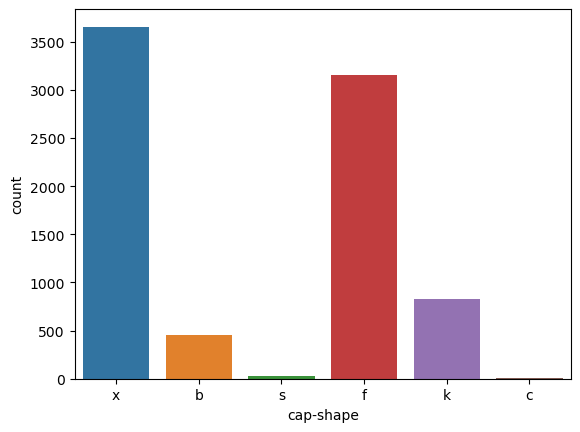

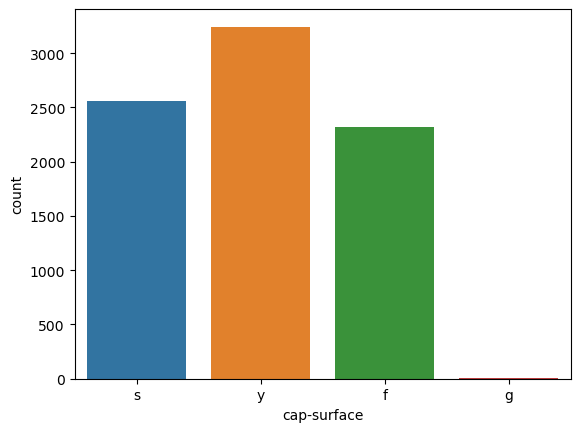

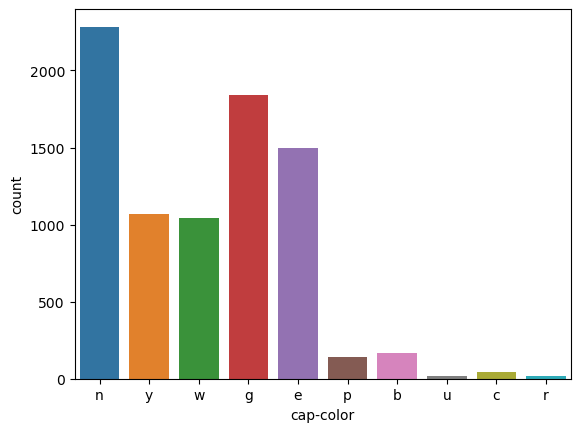

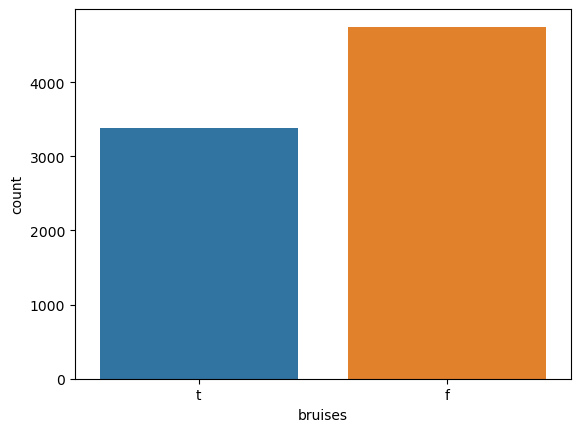

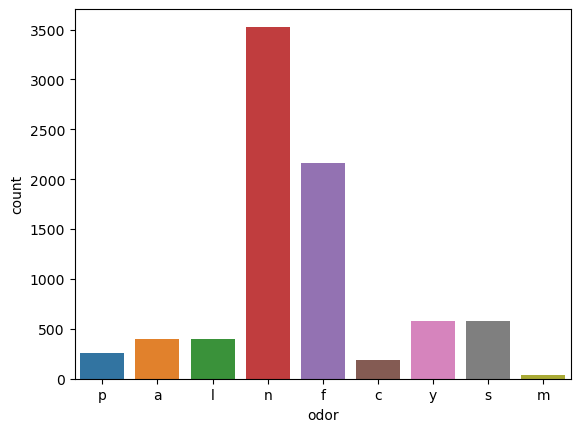

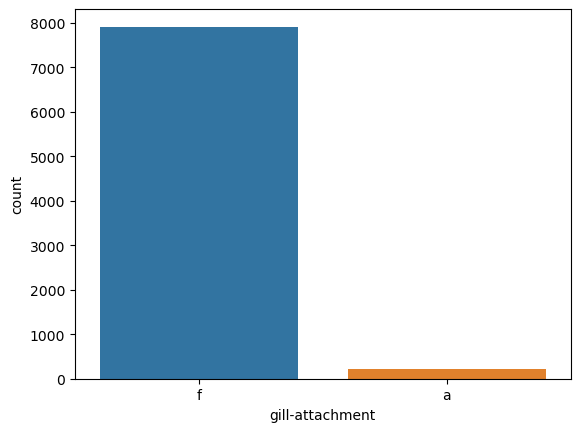

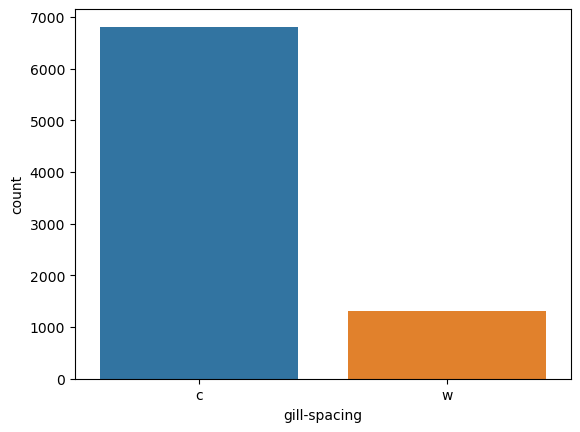

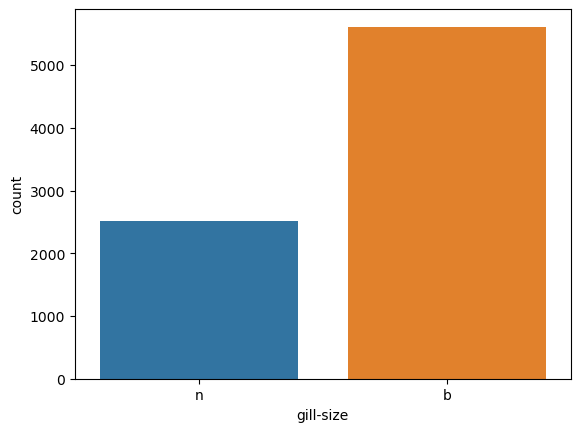

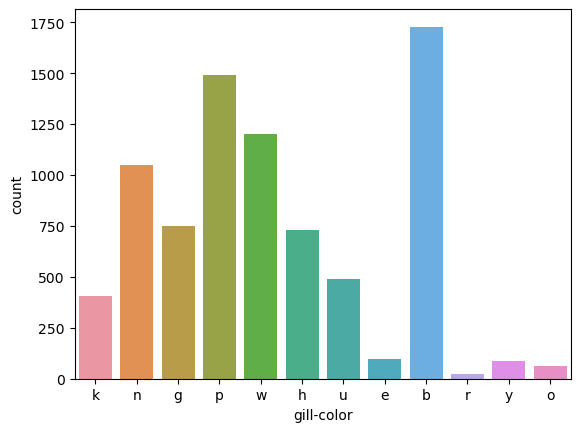

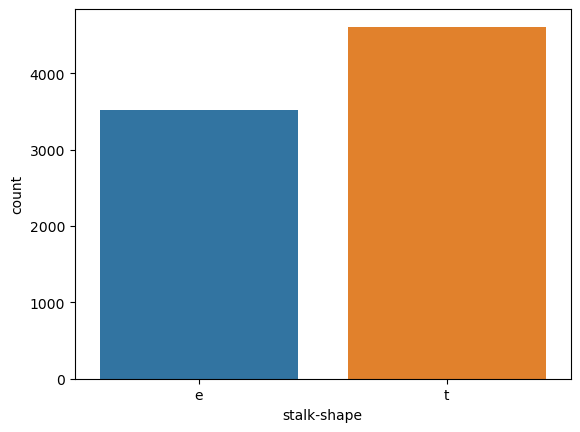

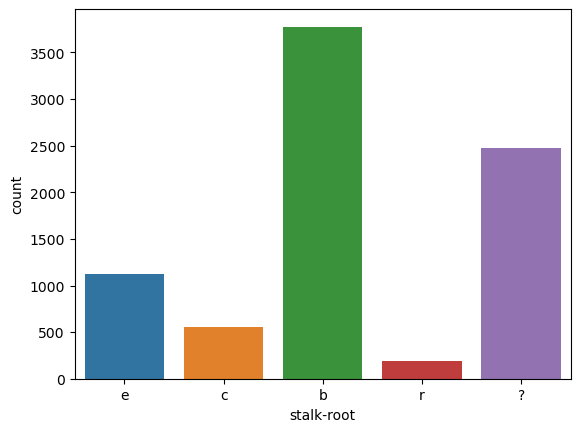

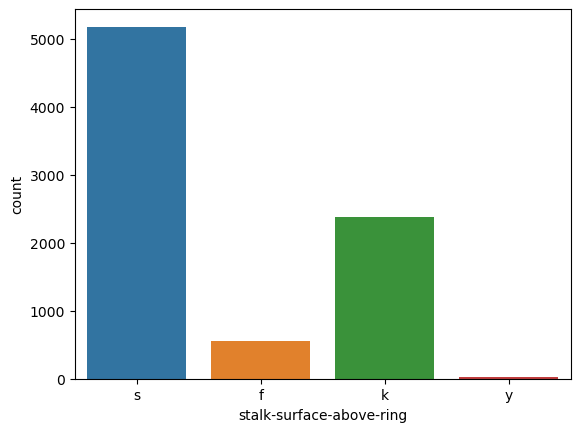

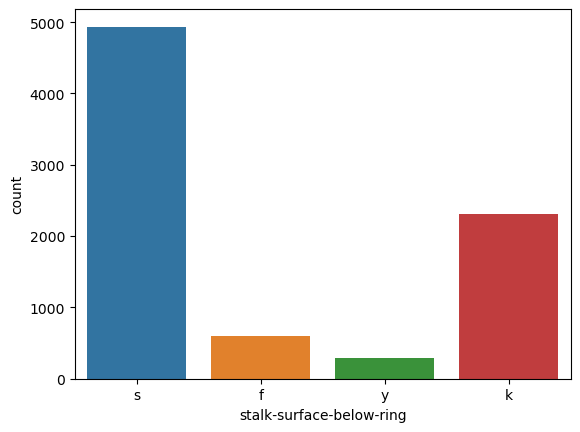

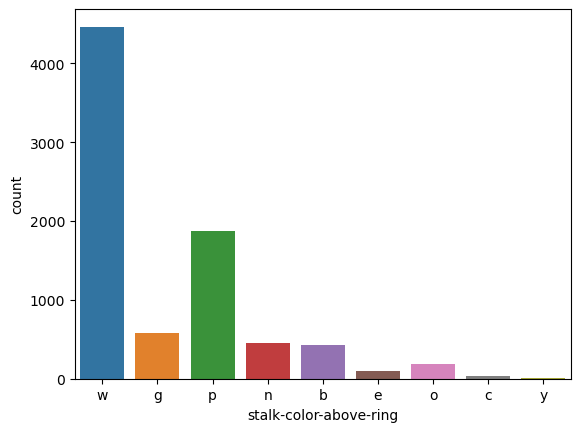

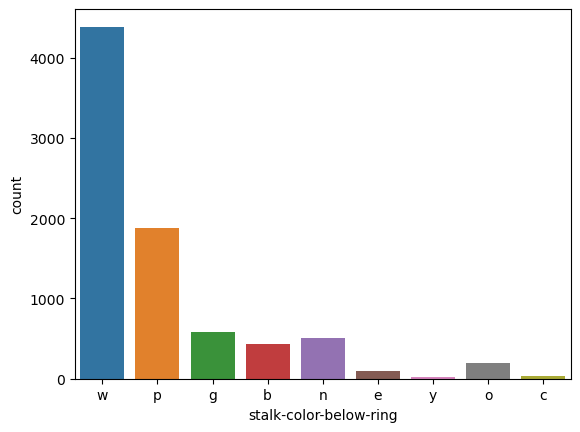

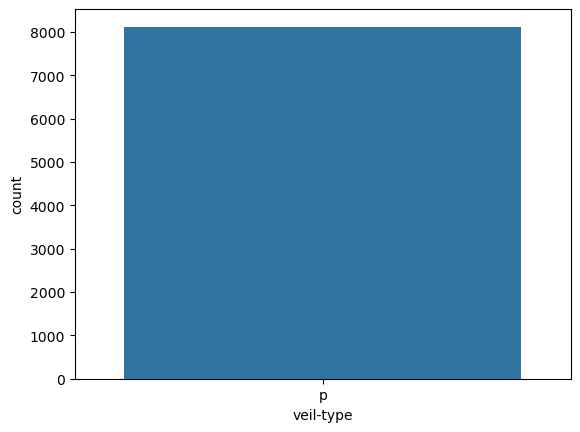

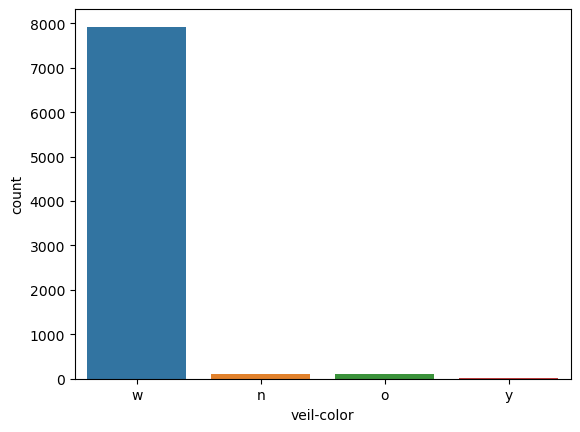

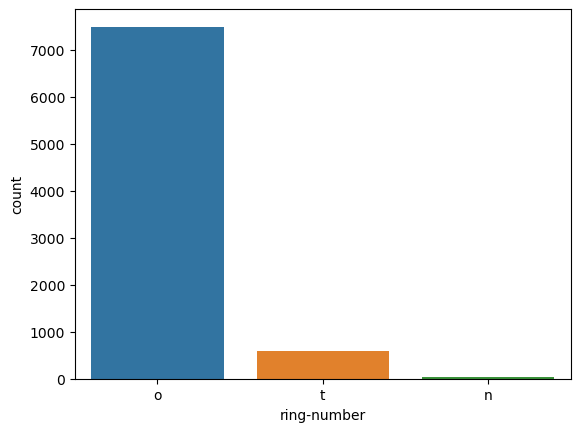

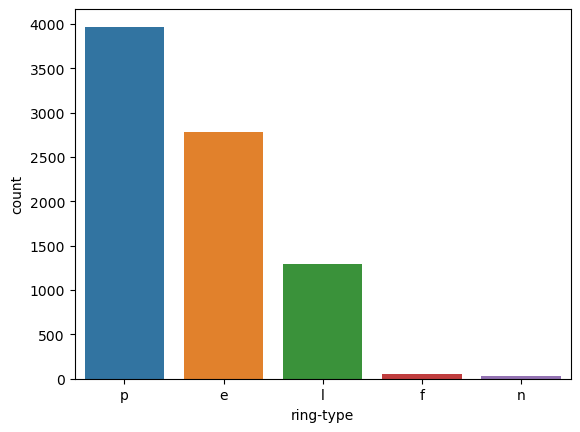

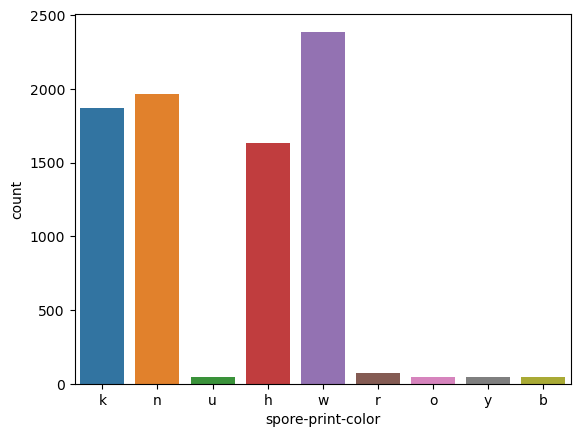

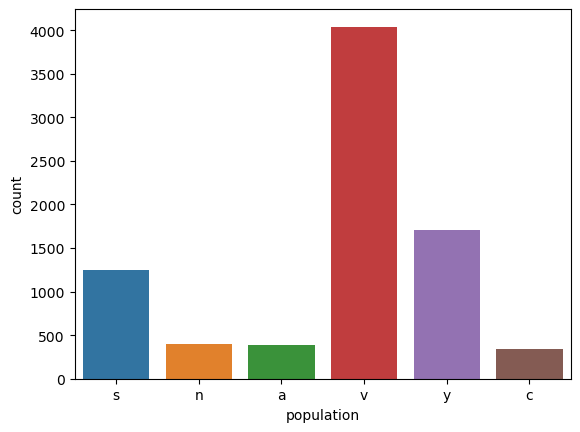

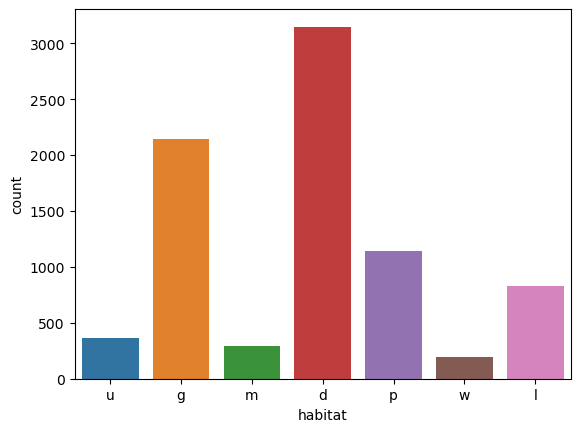

In [12]:
for i in df.columns:
    sns.countplot(x=i, data=df)
    plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [16]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


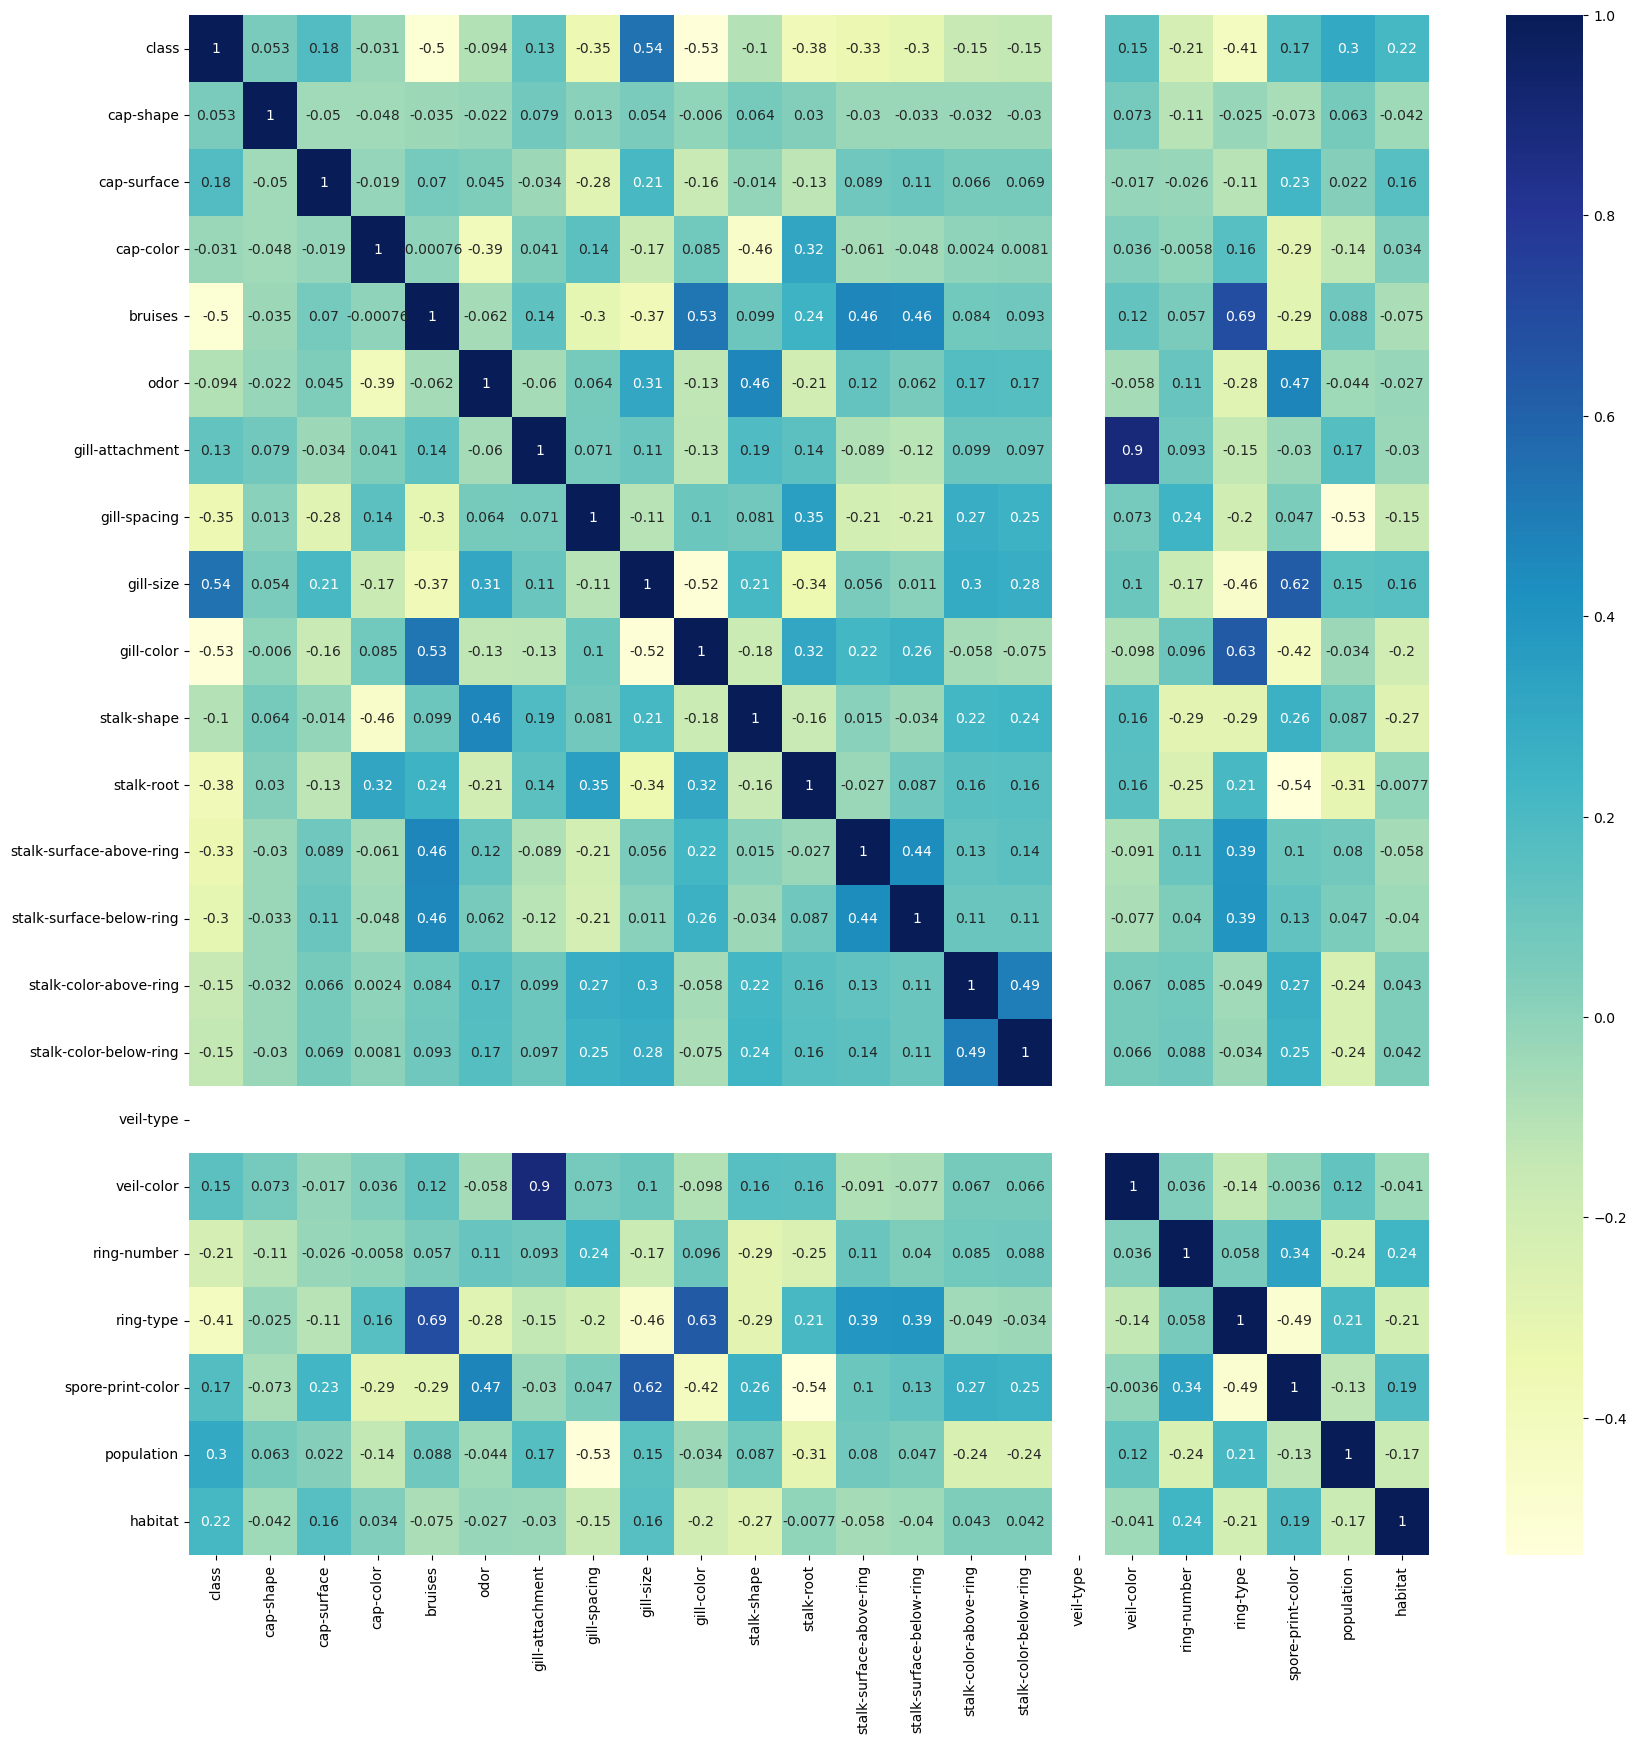

In [17]:
plt.figure(figsize=(20, 20))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
x = df.drop(columns=["class", "cap-color", "veil-type", "cap-shape"], axis=1)
y = df["class"]

In [20]:
np.random.seed(7)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [21]:
x_train.head()

,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2992,3,1,5,1,0,0,7,1,1,2,2,3,3,2,1,4,3,5,0
7568,3,0,2,1,0,1,0,1,0,2,1,7,7,2,1,0,7,4,0
2287,0,1,5,1,0,0,7,1,1,2,2,7,3,2,1,4,3,5,0
6521,2,0,8,1,0,1,0,1,0,1,1,6,7,2,1,0,7,4,4
6338,2,0,7,1,0,1,0,1,0,1,2,7,6,2,1,0,7,4,4


In [22]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6499, 19), (1625, 19), (6499,), (1625,))

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)
fit = knn.fit(x_train, y_train)
preds = fit.predict(x_test)

In [24]:
print(df.columns.values)

['class' 'cap-shape' 'cap-surface' 'cap-color' 'bruises' 'odor'
 'gill-attachment' 'gill-spacing' 'gill-size' 'gill-color' 'stalk-shape'
 'stalk-root' 'stalk-surface-above-ring' 'stalk-surface-below-ring'
 'stalk-color-above-ring' 'stalk-color-below-ring' 'veil-type'
 'veil-color' 'ring-number' 'ring-type' 'spore-print-color' 'population'
 'habitat']


In [25]:
lr = LogisticRegression()
fit = lr.fit(x_train, y_train)
preds = fit.predict(x_test)
lr.score(x_test, y_test)

0.9532307692307692

In [26]:
rfc = RandomForestClassifier()
fit = rfc.fit(x_train, y_train)
preds = fit.predict(x_test)
rfc.score(x_test, y_test)

1.0

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
fit = dtc.fit(x_train, y_train)
preds = fit.predict(x_test)
dtc.score(x_test, y_test)

1.0

In [28]:
from sklearn.model_selection import RandomizedSearchCV
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}
rscv = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5, n_iter=3,
                          verbose=True)
fit = rscv.fit(x_train, y_train)
preds = fit.predict(x_test)
rscv.score(x_test, y_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


1.0